State data shape: (1500, 360, 637)
Please initialize A_r and A_i manually
Mu binary data shape: (1500, 360, 637)
Mu raw data shape: (1500, 360, 647)
A_r or A_i not available. Skipping derived fields.


AttributeError: 'CGLEVisualizer' object has no attribute 'A_r'

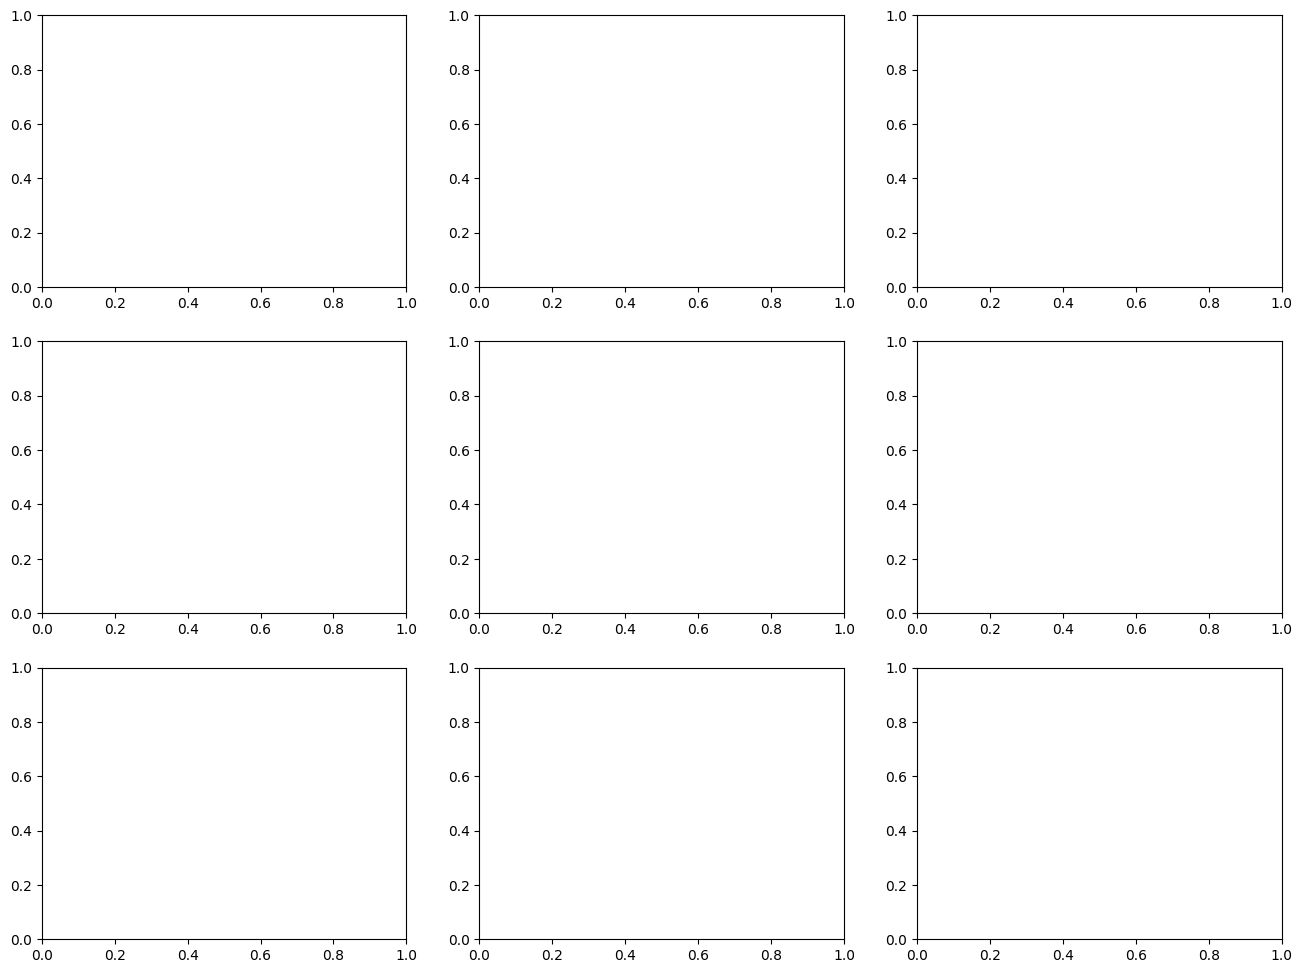

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from cgle_visualization import CGLEVisualizer

# Create output directory for visualizations
output_dir = "./cgle_visualizations"
os.makedirs(output_dir, exist_ok=True)

# Path to your data files
# Replace these with your actual file paths
state_data_path = "data/state_data.npy"
mu_binary_path = "data/myus_binarized.npy"
mu_raw_path = "data/myus_raw.npy"

# Initialize the visualizer
visualizer = CGLEVisualizer(output_dir=output_dir)

# Load data
visualizer.load_data(
    state_path=state_data_path,
    mu_binary_path=mu_binary_path,
    mu_raw_path=mu_raw_path
)

# Example 1: Visualize a specific time frame
frame_idx = 10  # Change to any time index you want to visualize
fig = visualizer.visualize_frame(
    time_idx=frame_idx,
    fig_size=(16, 12),
    save_path=os.path.join(output_dir, f"frame_{frame_idx}.png")
)
plt.close(fig)  # Close the figure to free memory

# Example 2: Create animation of phase and amplitude
visualizer.create_animation(
    output_filename="phase_amplitude_animation",
    start_idx=0,
    end_idx=50,  # Adjust based on your data size and needs
    interval=200,  # milliseconds between frames
    fps=5,
    dpi=100,
    mode='phase_amplitude'  # Simple animation showing phase as color, amplitude as brightness
)

# Example 3: Create animation with all fields
visualizer.create_animation(
    output_filename="full_animation",
    start_idx=0,
    end_idx=50,  # Adjust based on your data size
    interval=200,
    fps=5,
    dpi=100,
    mode='full'  # Comprehensive animation with all fields
)

# Example 4: Create animation of just the state (A_r, A_i, |A|, arg(A))
visualizer.create_animation(
    output_filename="state_animation",
    start_idx=0,
    end_idx=50,
    interval=200,
    fps=5,
    dpi=100,
    mode='state_only'
)

# Example 5: Create animation of just the mu fields (binary and raw)
visualizer.create_animation(
    output_filename="mu_animation",
    start_idx=0,
    end_idx=50,
    interval=200,
    fps=5,
    dpi=100,
    mode='mu_only'
)

# Example 6: Generate a sequence of frames for a video
# This is useful if you want to create a custom video with external tools
frames_dir = os.path.join(output_dir, "frames")
os.makedirs(frames_dir, exist_ok=True)

for i in range(0, min(100, visualizer.Nt), 5):  # Every 5th frame, up to 100
    fig = visualizer.visualize_frame(
        time_idx=i,
        fig_size=(16, 12),
        save_path=os.path.join(frames_dir, f"frame_{i:04d}.png")
    )
    plt.close(fig)

print(f"All visualizations saved to {output_dir}")